# Introduction


# 1. Import Libraries and Load Dataset
The dataset is sourced from: https://www.kaggle.com/datasets/ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import calendar 

In [2]:
df = pd.read_csv(r'D:\REGINA\yesgo\0 NEW\retail_store_sales.csv')

# 2. Initial Data Analysis

## 2.1. Dataset Overview

In [3]:
df.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


The dataset consists of 12,575 entries with 11 columns. Here is a brief description of each column:

- Transaction ID: A unique identifier for each transaction. Always present and unique.
- Customer ID: A unique identifier for each customer. Always present and unique.
- Category: The category of the purchased item.
- Item: The name of the purchased item. This column has some missing values, with 11,362 non-null entries out of 12,575.
- Price Per Unit: The static price of a single unit of the item. This column has some missing values, with 11,966 non-null entries.
- Quantity: The quantity of the purchased item. This column has some missing values, with 11,971 non-null entries.
- Total Spent: The total amount spent on the transaction, calculated as Quantity × Price Per Unit. This column has some missing values, with 11,971 non-null entries.
- Payment Method: The method of payment used.
- Location: The location where the transaction took place.
- Transaction Date: The date of the transaction.
- Discount Applied: Whether a discount was applied (True/False). This column has some missing values, with 8,376 non-null entries.

## 2.2. Summary Statistics

In [5]:
# Summary statistics for numerical variables
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [6]:
# Summary statistics for categorical variables
df.describe(include='object')

,Transaction ID,Customer ID,Category,Item,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,11362,12575,12575,12575,8376
unique,12575,25,8,200,3,2,1114,2
top,TXN_6867343,CUST_05,Furniture,Item_2_BEV,Cash,Online,2022-05-30,True
freq,1,544,1591,126,4310,6354,26,4219


Summary Statistics Results:
- Price Per Unit: Only 11,966 non-null entries, indicating missing values that need to be addressed. The average price per unit is \\$23.36, ranging from \\$5 to \\$41.
- Quantity: Only 11,971 non-null entries, meaning there are missing values to be addressed. The average quantity purchased is 5.5, ranging from 1 to 10.
- Total Spent: Only 11,971 non-null entries, indicating missing values that need to be addressed. The average spending is \\$129.65. The standard deviation suggests a spread in the data, with a minimum spending of \\$5 and a maximum of \\$410.
- Transaction ID: There are 12,575 unique transaction IDs, indicating that each transaction ID corresponds to a single item category.
- Customer ID: There are 25 unique customer IDs, suggesting repeat purchases by some customers. CUST_05 is the top customer, with 544 purchases.
- Category: There are 8 unique categories, with Furniture being the most frequently purchased category, totaling 1,591 transactions.
- Item: Only 11,362 non-null entries, meaning there are missing values to be addressed. There are 200 unique items, with Item_2_BEV being the top-selling item, purchased 126 times.
- Payment Method: There are 3 types of payment methods, which are Digital Wallet, Credit Card, and Cash. Cash is the most popular choice, used 4,310 times.
- Location: There are 2 types of transaction locations, which are Online and In-store. Online is the most popular, with 6,354 transactions.
- Transaction Date: There are 1,114 unique transaction dates, with the highest sales occurring on May 30, 2022, with 26 transactions.
- Discount Applied: Only 8,376 non-null entries, indicating missing values that need to be addressed. A total of 4,219 transactions received a discount.

# 3. Data Cleaning and Transformation

## 3.1. Reformat Column Titles
Since many column names still contain spaces, we can adjust their format to make them more suitable for use in Python.

In [7]:
# Replace spaces with underscores.
df.columns = df.columns.str.replace(' ', '_')

## 3.2. Handling Missing Values

In [8]:
# Calculate the percentage of missing values for each column
df.isnull().sum() / len(df) * 100

Transaction_ID       0.000000
Customer_ID          0.000000
Category             0.000000
Item                 9.646123
Price_Per_Unit       4.842942
Quantity             4.803181
Total_Spent          4.803181
Payment_Method       0.000000
Location             0.000000
Transaction_Date     0.000000
Discount_Applied    33.391650
dtype: float64

In [9]:
# Fill missing values in the Price Per Unit, Quantity, and Total Spent columns.
df['Price_Per_Unit'] = df['Price_Per_Unit'].fillna(df['Total_Spent'] / df['Quantity'])
df['Total_Spent'] = df['Total_Spent'].fillna(df['Quantity'] * df['Price_Per_Unit'])
df['Quantity'] = df['Quantity'].fillna(df['Total_Spent'] / df['Price_Per_Unit'])

In [10]:
# Recheck for any missing values
df.isnull().sum() / len(df) * 100

Transaction_ID       0.000000
Customer_ID          0.000000
Category             0.000000
Item                 9.646123
Price_Per_Unit       0.000000
Quantity             4.803181
Total_Spent          4.803181
Payment_Method       0.000000
Location             0.000000
Transaction_Date     0.000000
Discount_Applied    33.391650
dtype: float64

It is observed that the remaining missing values are in the Quantity and Total Spent columns. Since both are empty, we can simply remove the rows where both values are missing.

In [11]:
df = df.dropna(subset=['Quantity', 'Total_Spent'], how='all')

The Item column is crucial for data analysis, so we can remove the 9% of missing data to ensure more accurate and meaningful insights.

In [12]:
df = df.dropna(subset=['Item'])

Since 33% of the values in the Discount Applied column are missing, we will assume that no discount was given.

In [13]:
df['Discount_Applied'] = df['Discount_Applied'].fillna('False')

In [14]:
# Verify the removal of missing values
df.isnull().sum().sum()

0

## 3.3. Handling Duplicates

In [15]:
# Check for duplicates in the data
df.duplicated().sum()

0

It appears that there are no duplicate records in this dataset.

## 3.4. Converting Data Types
The Transaction Date and Discount Applied columns are still in Object format, so they need to be converted accordingly.

In [16]:
# Check the date format of the Transaction Date column
df['Transaction_Date']

0        2024-04-08
1        2023-07-23
2        2022-10-05
3        2022-05-07
4        2022-10-02
            ...    
12570    2023-09-03
12571    2022-08-12
12572    2024-08-24
12573    2023-12-30
12574    2022-08-06
Name: Transaction_Date, Length: 11362, dtype: object

In [17]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%Y-%m-%d')
df['Discount_Applied'] = df['Discount_Applied'].astype(bool)

In [18]:
# Recheck the data types of each column
df.dtypes

Transaction_ID              object
Customer_ID                 object
Category                    object
Item                        object
Price_Per_Unit             float64
Quantity                   float64
Total_Spent                float64
Payment_Method              object
Location                    object
Transaction_Date    datetime64[ns]
Discount_Applied              bool
dtype: object

## 3.5. Validating Data Consistency
Next, we need to ensure that the values in the Total Spent column are correctly calculated as Price Per Unit × Quantity.

In [19]:
df['Calculated_Total'] = df['Price_Per_Unit'] * df['Quantity']

In [20]:
inconsistent_rows = df[df['Total_Spent'] != df['Calculated_Total']]
inconsistent_rows

,Transaction_ID,Customer_ID,Category,Item,Price_Per_Unit,Quantity,Total_Spent,Payment_Method,Location,Transaction_Date,Discount_Applied,Calculated_Total


The calculated values are consistent, so we can remove the newly created Calculated Total column.

In [21]:
df.drop(columns=['Calculated_Total'], inplace=True)

## 3.6. Checking If Items Belong to Their Categories

In [22]:
# Check for unique categories
df['Category'].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

In [23]:
# Standardize the Category formatting
df['Category'] = df['Category'].replace('Electric household essentials', 'Electric Household Essentials')
df['Category'] = df['Category'].replace('Computers and electric accessories', 'Computers and Electric Accessories')

In [24]:
# Check for unique items
df['Item'].unique()

array(['Item_10_PAT', 'Item_17_MILK', 'Item_12_BUT', 'Item_16_BEV',
       'Item_6_FOOD', 'Item_1_FOOD', 'Item_16_FUR', 'Item_22_BUT',
       'Item_3_BUT', 'Item_2_FOOD', 'Item_24_PAT', 'Item_16_MILK',
       'Item_17_PAT', 'Item_13_EHE', 'Item_7_BEV', 'Item_4_EHE',
       'Item_10_FOOD', 'Item_14_FUR', 'Item_20_BUT', 'Item_25_FUR',
       'Item_14_FOOD', 'Item_22_PAT', 'Item_11_FOOD', 'Item_6_PAT',
       'Item_21_EHE', 'Item_25_BEV', 'Item_23_FOOD', 'Item_10_FUR',
       'Item_11_BEV', 'Item_23_BUT', 'Item_22_BEV', 'Item_10_EHE',
       'Item_24_BUT', 'Item_8_BEV', 'Item_3_FOOD', 'Item_12_FOOD',
       'Item_16_CEA', 'Item_11_PAT', 'Item_16_BUT', 'Item_5_CEA',
       'Item_19_MILK', 'Item_23_FUR', 'Item_7_FUR', 'Item_15_CEA',
       'Item_6_MILK', 'Item_24_CEA', 'Item_22_CEA', 'Item_22_FOOD',
       'Item_2_BUT', 'Item_14_PAT', 'Item_12_PAT', 'Item_18_FOOD',
       'Item_1_PAT', 'Item_4_BEV', 'Item_22_FUR', 'Item_7_PAT',
       'Item_20_CEA', 'Item_20_FOOD', 'Item_11_FUR', 'Item_25_P

In [25]:
# Extract and check unique item categories
df['Check_Item_Category'] = df['Item'].str.extract(r'Item_\d+_([A-Z]+)')
df['Check_Item_Category'].unique()

array(['PAT', 'MILK', 'BUT', 'BEV', 'FOOD', 'FUR', 'EHE', 'CEA'],
      dtype=object)

From the results above, we can see that:
- The code PAT corresponds to Patisserie
- The code MILK corresponds to Milk Products
- The code BUT corresponds to Butchers
- The code BEV corresponds to Beverages
- The code FOOD corresponds to Food
- The code FUR corresponds to Furniture
- The code EHE corresponds to Electric Household Essentials
- The code CEA corresponds to Computers and Electric Accessories

Since the item codes correctly match their respective categories, we can remove the newly created Check Item Category column.

In [26]:
df.drop(columns=['Check_Item_Category'], inplace=True)

## 3.7. Checking the Format of Transaction ID and Customer ID
Now we will check whether the format of Transaction ID and Customer ID is consistent for all values.

In [27]:
# Extract the prefix and count the digits in the Transaction ID
df['Transaction_ID_Prefix'] = df['Transaction_ID'].str.extract(r'([^0-9]+)')
df['Transaction_ID_Number'] = df['Transaction_ID'].str.extract(r'(\d+)')
df['Transaction_ID_Number_Length'] = df['Transaction_ID_Number'].astype(str).apply(len)
print(df[['Transaction_ID_Prefix', 'Transaction_ID_Number_Length']].drop_duplicates())

  Transaction_ID_Prefix  Transaction_ID_Number_Length
0                  TXN_                             7


In [28]:
# Extract the prefix and count the digits in the Customer ID
df['Customer_ID_Prefix'] = df['Customer_ID'].str.extract(r'([^0-9]+)')
df['Customer_ID_Number'] = df['Customer_ID'].str.extract(r'(\d+)')
df['Customer_ID_Number_Length'] = df['Customer_ID_Number'].astype(str).apply(len)
print(df[['Customer_ID_Prefix', 'Customer_ID_Number_Length']].drop_duplicates())

  Customer_ID_Prefix  Customer_ID_Number_Length
0              CUST_                          2


The result shows that the formats of Transaction ID and Customer ID are consistent, so we can delete these unnecessary columns.

In [29]:
df.drop(columns=['Transaction_ID_Prefix', 'Transaction_ID_Number', 'Transaction_ID_Number_Length'], inplace=True)
df.drop(columns=['Customer_ID_Prefix', 'Customer_ID_Number', 'Customer_ID_Number_Length'], inplace=True)

# 4. Feature Engineering

## 4.1. Transaction Time Features
Helps analyze transactions trends based on transaction dates.

In [30]:
# Create new columns related to Transaction Date
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month
df['Day'] = df['Transaction_Date'].dt.day
df['Weekday'] = df['Transaction_Date'].dt.day_name()
df['Weekend'] = df['Transaction_Date'].dt.weekday >= 5
df.head()

,Transaction_ID,Customer_ID,Category,Item,Price_Per_Unit,Quantity,Total_Spent,Payment_Method,Location,Transaction_Date,Discount_Applied,Year,Month,Day,Weekday,Weekend
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,4,8,Monday,False
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,7,23,Sunday,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,10,5,Wednesday,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,True,2022,5,7,Saturday,True
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,10,2,Sunday,True


In [31]:
# Calculate daily transactions volume
daily_transactions = df.groupby(df['Transaction_Date'].dt.date).agg(Transactions_Volume=('Transaction_ID', 'count')).reset_index()
daily_transactions.head()

,Transaction_Date,Transactions_Volume
0,2022-01-01,11
1,2022-01-02,8
2,2022-01-03,8
3,2022-01-04,7
4,2022-01-05,13


## 4.2. Transactions & Revenue Features
Helps analyze product performance based on transactions volume and total revenue.

In [32]:
# Calculate total transactions and total revenue per item
total_transactions_per_item = df.groupby('Item').agg(Total_Transactions=('Quantity', 'sum')).reset_index()
total_revenue_per_item = df.groupby('Item').agg(Total_Revenue=('Total_Spent', 'sum')).reset_index()
product_performance = pd.merge(total_transactions_per_item, total_revenue_per_item, on='Item')
product_performance.head()

,Item,Total_Transactions,Total_Revenue
0,Item_10_BEV,156.0,2886.0
1,Item_10_BUT,94.0,1739.0
2,Item_10_CEA,392.0,7252.0
3,Item_10_EHE,206.0,3811.0
4,Item_10_FOOD,286.0,5291.0


In [33]:
# Calculate total transactions and total revenue per category
total_transactions_per_category = df.groupby('Category').agg(Total_Transactions=('Quantity', 'sum')).reset_index()
total_revenue_per_category = df.groupby('Category').agg(Total_Revenue=('Total_Spent', 'sum')).reset_index()
category_performance = pd.merge(total_transactions_per_category, total_revenue_per_category, on='Category')
category_performance.head()

,Category,Total_Transactions,Total_Revenue
0,Beverages,7974.0,187978.5
1,Butchers,7774.0,197426.0
2,Computers and Electric Accessories,7832.0,180902.5
3,Electric Household Essentials,7897.0,192441.5
4,Food,7925.0,184645.0


## 4.3. Discount Impact Features
Evaluates the effectiveness of discounts on transactions and revenue.

In [34]:
# Calculate the impact of discounts on transactions and revenue  
transactions_with_discount = df[df['Discount_Applied'] == True].shape[0]
transactions_without_discount = df[df['Discount_Applied'] == False].shape[0]
discount_effect_on_total_transaction = df.groupby('Discount_Applied').agg(Total_Transactions=('Transaction_ID', 'nunique')).reset_index()
discount_effect_on_revenue = df.groupby('Discount_Applied').agg(Total_Revenue=('Total_Spent', 'sum')).reset_index()
discount_impact = pd.merge(discount_effect_on_total_transaction, discount_effect_on_revenue, on='Discount_Applied')
discount_impact

,Discount_Applied,Total_Transactions,Total_Revenue
0,False,3778,491632.5
1,True,7584,981366.0


## 4.4. Location-Based Features
Helps identify transactions patterns by location (online/offline) and customer preferences in different areas.

In [35]:
# Analyze the impact of location on transactions, revenue, and average transaction per customer
total_transactions_per_location = df.groupby('Location').agg(Total_Transactions=('Quantity','sum')).reset_index()
total_revenue_per_location = df.groupby('Location').agg(Total_Revenue=('Total_Spent', 'sum')).reset_index()
transaction_per_cust_per_location = df.groupby(['Location', 'Customer_ID']).agg(Total_Transaction=('Transaction_ID', 'count')).reset_index()
transaction_per_cust_per_location = transaction_per_cust_per_location.groupby('Location').agg(Average_Transaction_Per_Customer=('Total_Transaction', 'mean')).reset_index()
location_analysis = pd.merge(total_transactions_per_location, total_revenue_per_location, on='Location')\
    .merge(transaction_per_cust_per_location, on='Location')
location_analysis

,Location,Total_Transactions,Total_Revenue,Average_Transaction_Per_Customer
0,In-store,30949.0,723567.5,224.68
1,Online,31940.0,749431.0,229.80


# 5. Exploratory Data Analysis

## 5.1. Transactions Performance Analysis

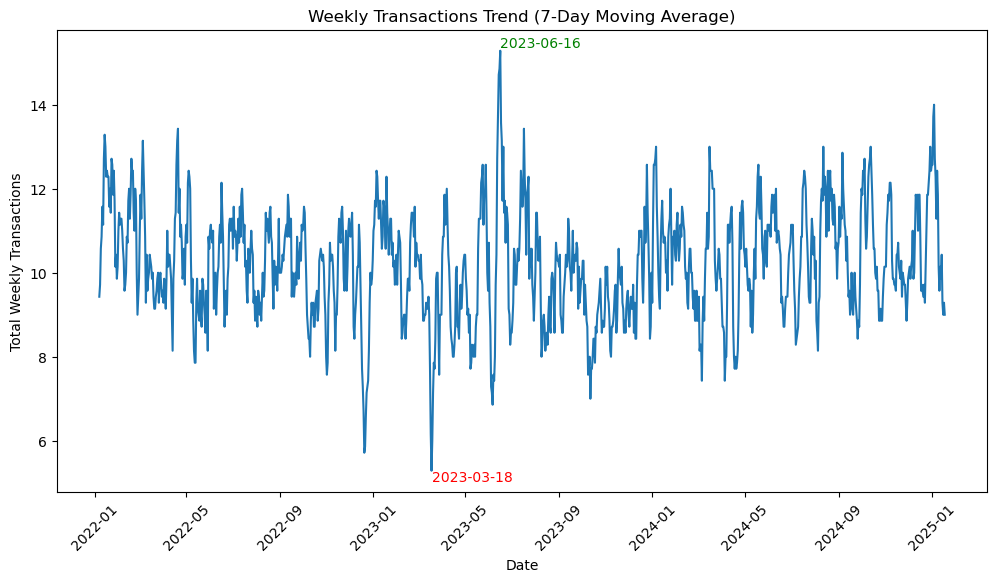

In [36]:
# Visualize the trend of weekly transactions with 7-day moving average
daily_transactions['Weekly_Transactions'] = daily_transactions['Transactions_Volume'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_transactions, x='Transaction_Date', y='Weekly_Transactions')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Weekly Transactions')
plt.title('Weekly Transactions Trend (7-Day Moving Average)')

# Add transaction date labels at the highest and lowest points
max_index = daily_transactions['Weekly_Transactions'].idxmax()
min_index = daily_transactions['Weekly_Transactions'].idxmin()
plt.text(daily_transactions['Transaction_Date'].iloc[max_index], daily_transactions['Weekly_Transactions'].iloc[max_index], 
         daily_transactions["Transaction_Date"].iloc[max_index].strftime("%Y-%m-%d"), 
         horizontalalignment='left', verticalalignment='bottom', color='green')
plt.text(daily_transactions['Transaction_Date'].iloc[min_index], daily_transactions['Weekly_Transactions'].iloc[min_index], 
         daily_transactions["Transaction_Date"].iloc[min_index].strftime("%Y-%m-%d"), 
         horizontalalignment='left', verticalalignment='top', color='red')

plt.show()

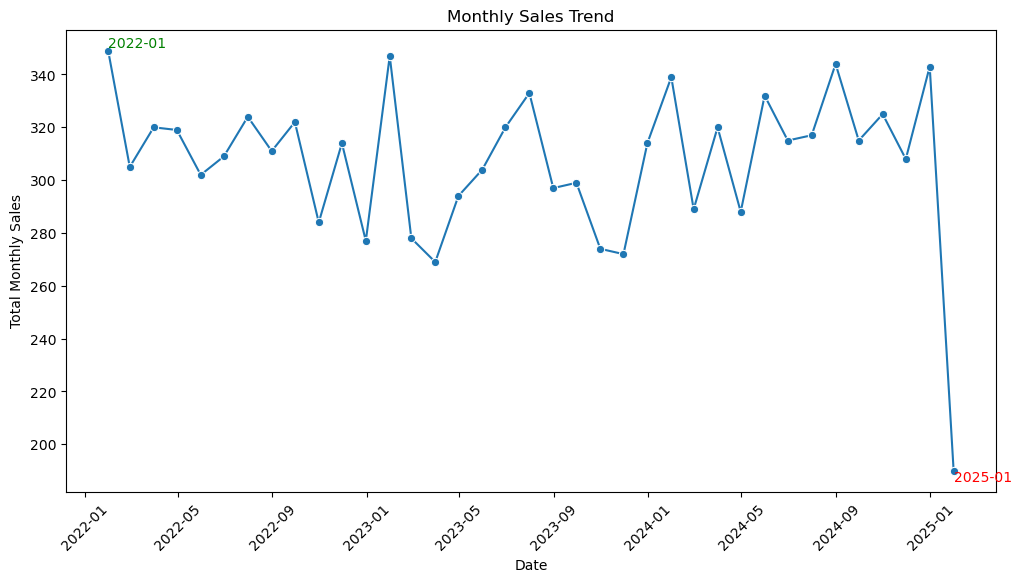

In [53]:
# Visualize the trend of monthly transactions
daily_transactions['Transaction_Date'] = pd.to_datetime(daily_transactions['Transaction_Date'])
monthly_transactions = daily_transactions.resample('ME', on='Transaction_Date').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_transactions, x='Transaction_Date', y='Transactions_Volume', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales')
plt.title('Monthly Sales Trend')

# Add transaction date labels at the highest and lowest points
max_index = monthly_transactions['Transactions_Volume'].idxmax()
min_index = monthly_transactions['Transactions_Volume'].idxmin()
plt.text(max_index, monthly_transactions.loc[max_index, 'Transactions_Volume'], 
         max_index.strftime('%Y-%m'), 
         horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.text(min_index, monthly_transactions.loc[min_index, 'Transactions_Volume'], 
         min_index.strftime('%Y-%m'), 
         horizontalalignment='left', verticalalignment='top', fontsize=10, color='red')

plt.show()

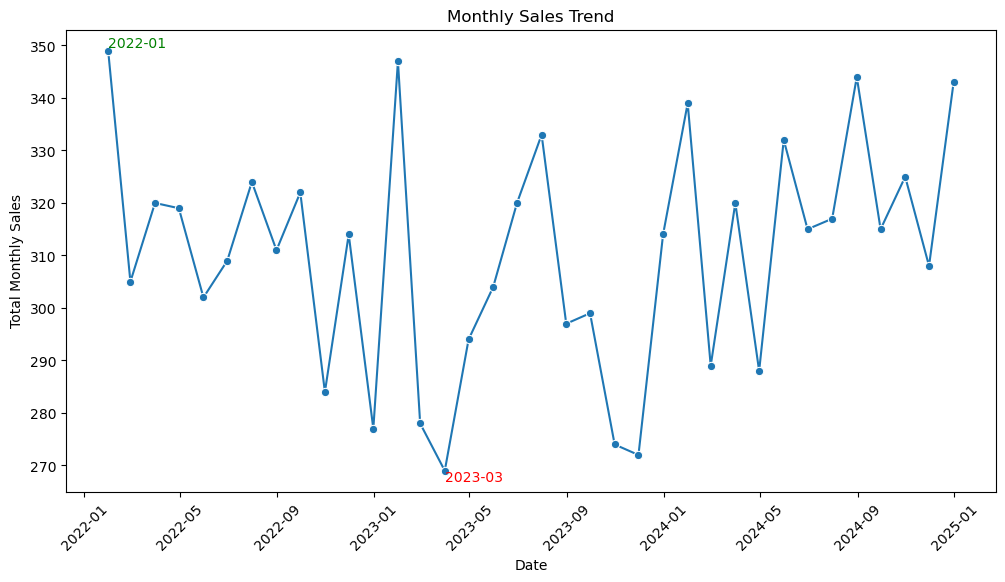

In [52]:
# Visualize the trend of monthly transactions
daily_transactions['Transaction_Date'] = pd.to_datetime(daily_transactions['Transaction_Date'])
monthly_transactions = daily_transactions.resample('ME', on='Transaction_Date').sum()
monthly_transactions = monthly_transactions[monthly_transactions.index.year != 2025]

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_transactions, x='Transaction_Date', y='Transactions_Volume', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales')
plt.title('Monthly Sales Trend')

# Add transaction date labels at the highest and lowest points
max_index = monthly_transactions['Transactions_Volume'].idxmax()
min_index = monthly_transactions['Transactions_Volume'].idxmin()
plt.text(max_index, monthly_transactions.loc[max_index, 'Transactions_Volume'], 
         max_index.strftime('%Y-%m'), 
         horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.text(min_index, monthly_transactions.loc[min_index, 'Transactions_Volume'], 
         min_index.strftime('%Y-%m'), 
         horizontalalignment='left', verticalalignment='top', fontsize=10, color='red')

plt.show()

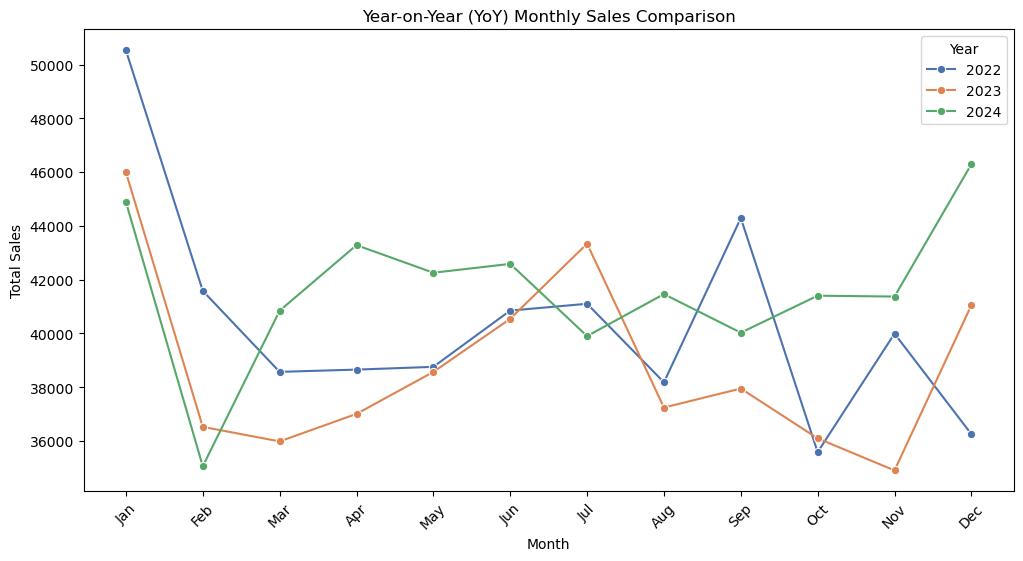

In [51]:
# Plot Year-on-Year (YoY) sales comparison by month
monthly_yoy = df.groupby(['Year', 'Month']).agg(Total_Sales=('Total_Spent', 'sum')).reset_index()
monthly_yoy = monthly_yoy[monthly_yoy["Year"] < 2025]
monthly_yoy['Month_Name'] = monthly_yoy['Month'].apply(lambda x: calendar.month_abbr[x])
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_yoy, x='Month', y='Total_Sales', marker='o', hue='Year', palette='deep')
plt.xticks(ticks=range(1, 13), labels=calendar.month_abbr[1:13], rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Year-on-Year (YoY) Monthly Sales Comparison')
plt.legend(title='Year')
plt.show()

## 5.2. Product Performance Analysis

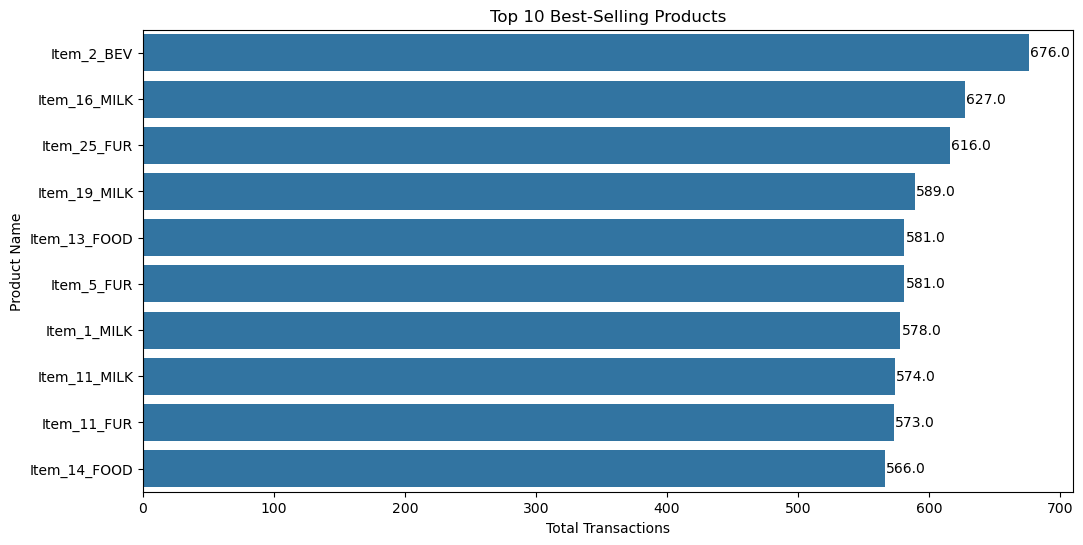

In [40]:
# Visualize the top 10 best-selling products by total transactions
product_performance = product_performance.sort_values(by='Total_Transactions', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_performance.head(10), x='Total_Transactions', y='Item')
for index, value in enumerate(product_performance.head(10)['Total_Transactions']):
    plt.text(value + 1, index, f'{value}', va='center')
plt.xlabel('Total Transactions')
plt.ylabel('Product Name')
plt.title('Top 10 Best-Selling Products')
plt.show()

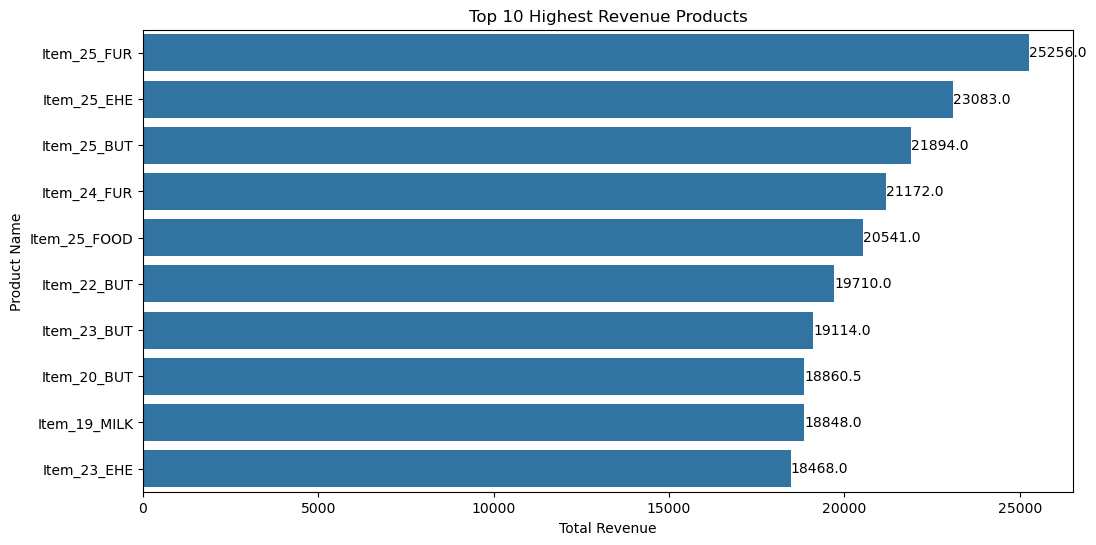

In [41]:
# Visualize the top 10 highest revenue-generating products
product_performance = product_performance.sort_values(by='Total_Revenue', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_performance.head(10), x='Total_Revenue', y='Item')
for index, value in enumerate(product_performance.head(10)['Total_Revenue']):
    plt.text(value + 1, index, f'{value}', va='center')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.title('Top 10 Highest Revenue Products')
plt.show()

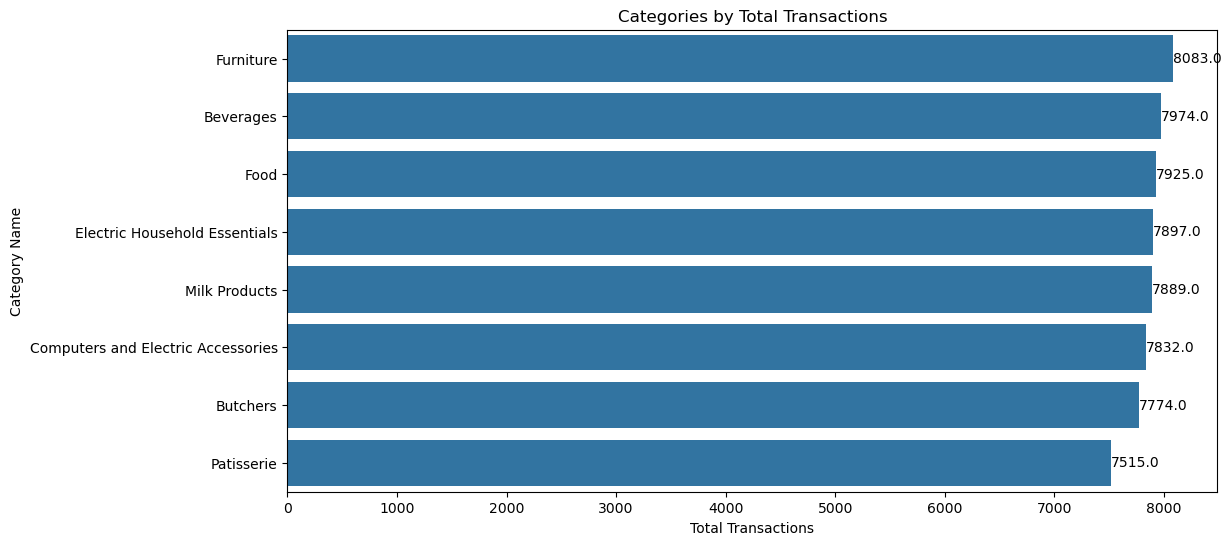

In [42]:
# Visualize category performance based on total transactions
category_performance = category_performance.sort_values(by='Total_Transactions', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='Total_Transactions', y='Category')
for index, value in enumerate(category_performance['Total_Transactions']):
    plt.text(value + 1, index, f'{value}', va='center')
plt.xlabel('Total Transactions')
plt.ylabel('Category Name')
plt.title('Categories by Total Transactions')
plt.show()

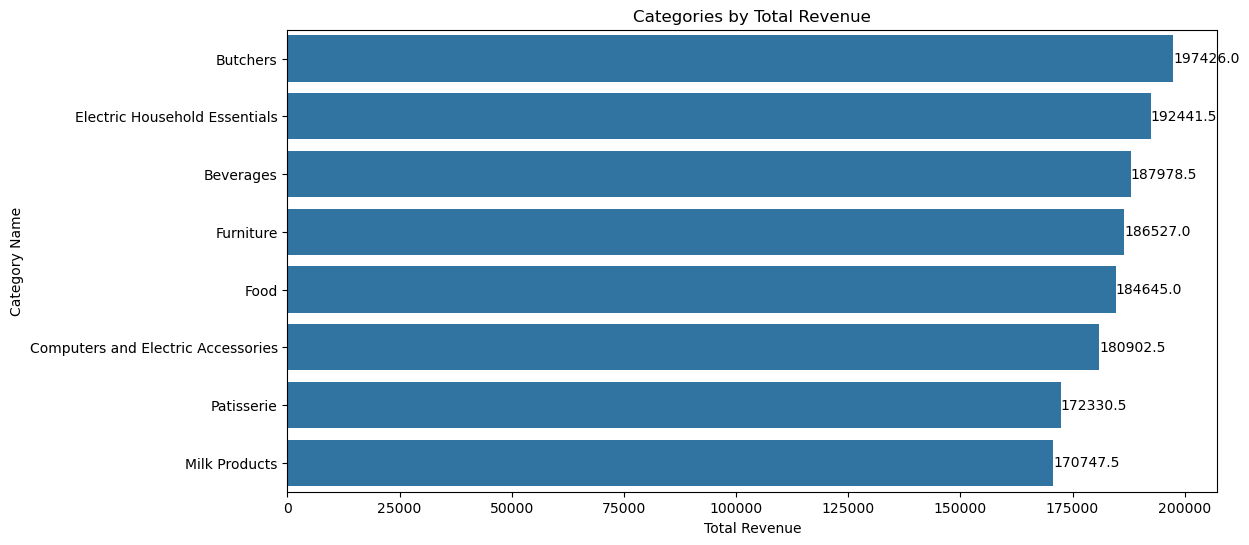

In [43]:
# Visualize category performance based on total revenue
category_performance = category_performance.sort_values(by='Total_Revenue', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=category_performance, x='Total_Revenue', y='Category')
for index, value in enumerate(category_performance['Total_Revenue']):
    plt.text(value + 1, index, f'{value}', va='center')
plt.xlabel('Total Revenue')
plt.ylabel('Category Name')
plt.title('Categories by Total Revenue')
plt.show()

## 5.3. Discount Effectiveness Analysis

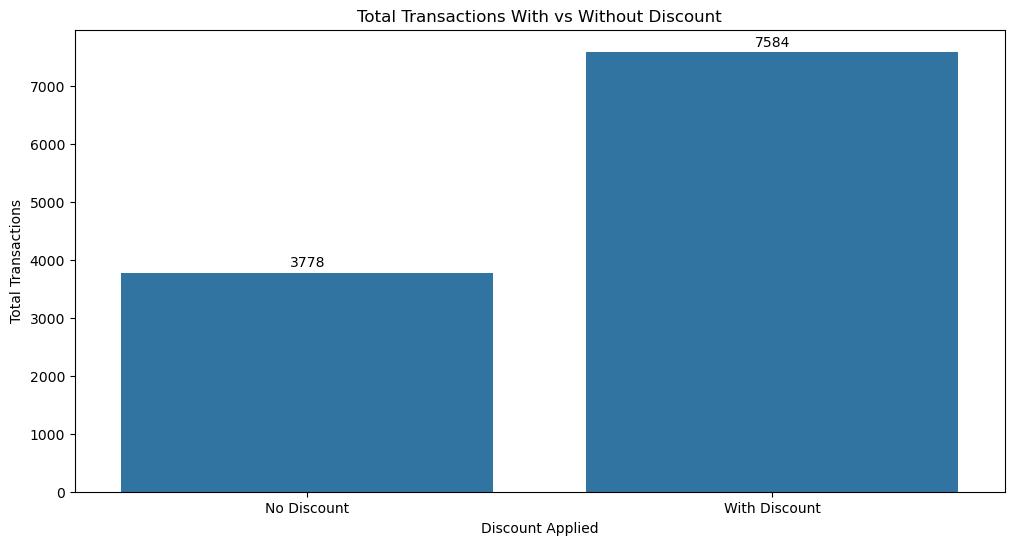

In [44]:
# Visualize total transactions with and without discounts
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_impact, x='Discount_Applied', y='Total_Transactions')
plt.title('Total Transactions With vs Without Discount')
for index, value in enumerate(discount_impact['Total_Transactions']):
    plt.text(index, value + 100, f'{value}', ha='center')
plt.xlabel('Discount Applied')
plt.ylabel('Total Transactions')
plt.xticks([0, 1], ['No Discount', 'With Discount'])
plt.show()

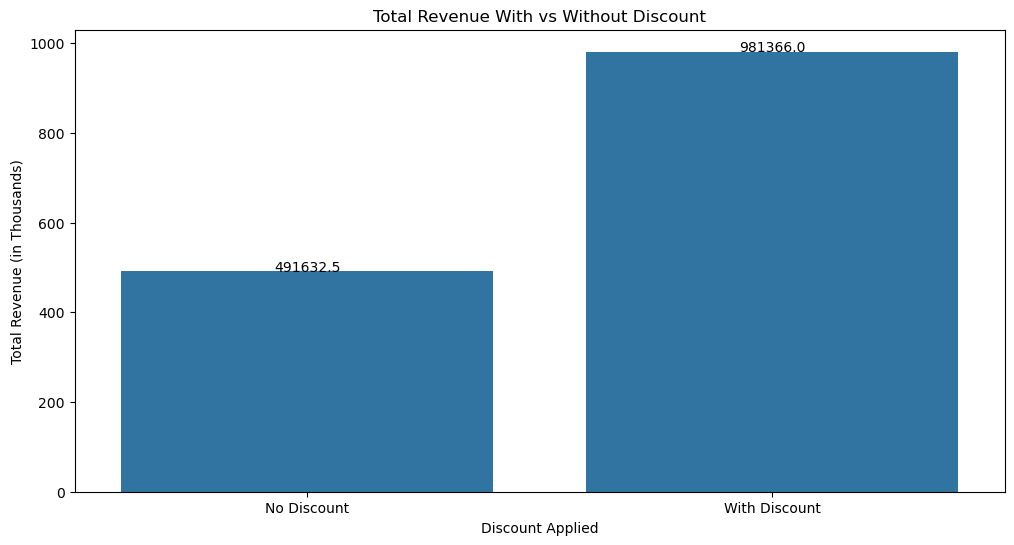

In [45]:
# Visualize total revenue with and without discounts
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_impact, x='Discount_Applied', y='Total_Revenue')
plt.title('Total Revenue With vs Without Discount')
for index, value in enumerate(discount_impact['Total_Revenue']):
    plt.text(index, value + 100, f'{value}', ha='center')
plt.xlabel('Discount Applied')
plt.ylabel('Total Revenue (in Thousands)')
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}'))
plt.xticks([0, 1], ['No Discount', 'With Discount'])
plt.show()

## 5.4. Location-Based Sales Analysis

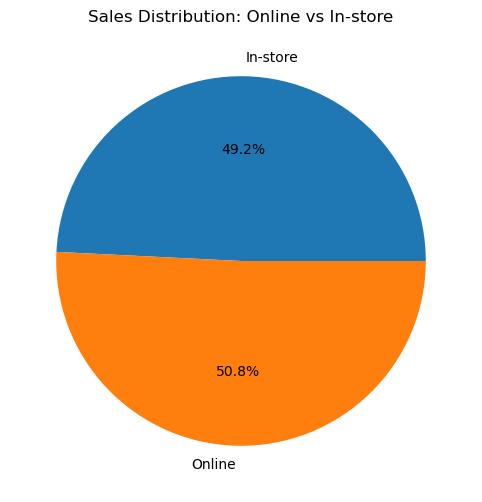

In [46]:
# Visualize the distribution of sales between online and in-store locations
plt.figure(figsize=(12, 6))
plt.pie(location_analysis['Total_Transactions'], labels=location_analysis['Location'], autopct='%1.1f%%')
plt.title('Sales Distribution: Online vs In-store')
plt.show()

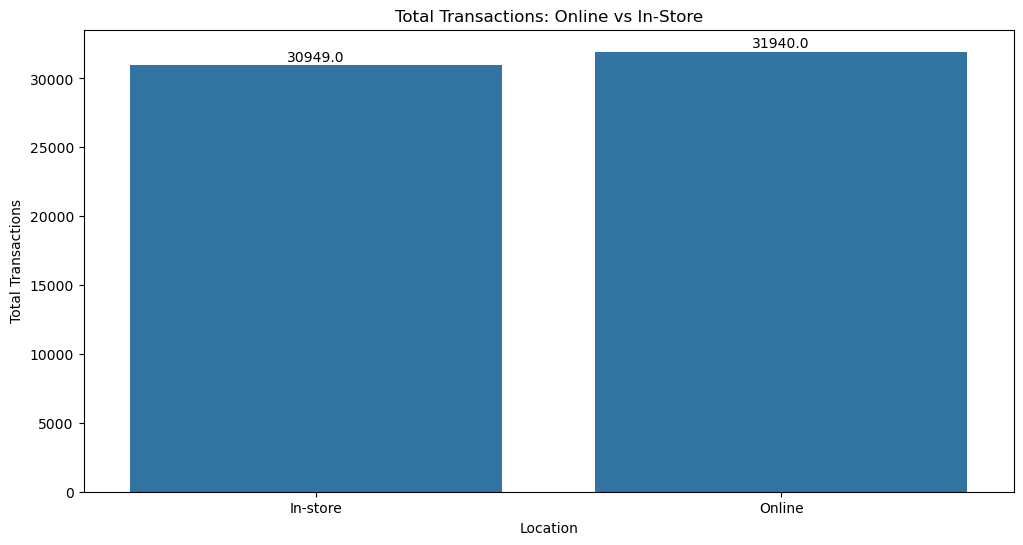

In [47]:
# Visualize total transactions by location
plt.figure(figsize=(12, 6))
sns.barplot(data=location_analysis, x='Location', y='Total_Transactions')
plt.title('Total Transactions: Online vs In-Store')
for index, value in enumerate(location_analysis['Total_Transactions']):
    plt.text(index, value + 300, f'{value}', ha='center')
plt.xlabel('Location')
plt.ylabel('Total Transactions')
plt.show()

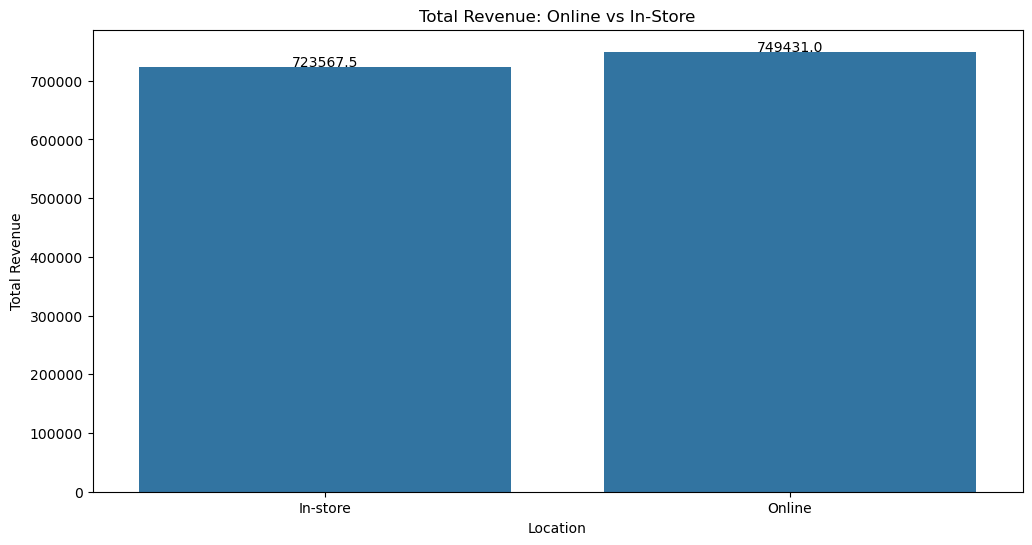

In [48]:
# Visualize total revenue by location
plt.figure(figsize=(12, 6))
sns.barplot(data=location_analysis, x='Location', y='Total_Revenue')
plt.title('Total Revenue: Online vs In-Store')
for index, value in enumerate(location_analysis['Total_Revenue']):
    plt.text(index, value + 300, f'{value}', ha='center')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.show()

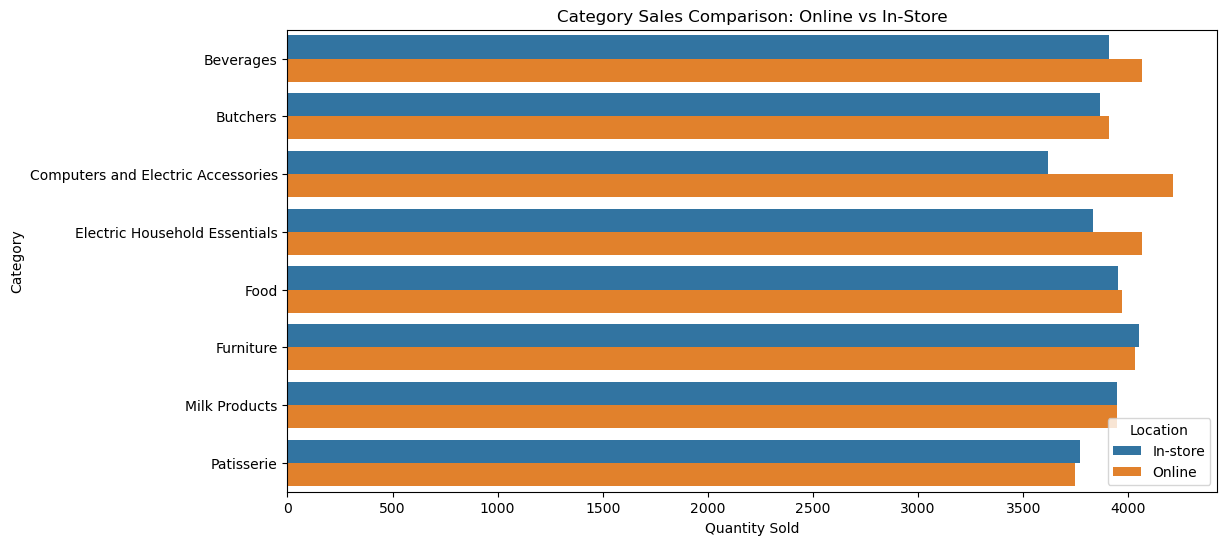

In [49]:
# Visualize sales comparison of categories between online and in-store locations
category_per_location = df.groupby(['Location', 'Category'])['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=category_per_location, y='Category', x='Quantity', hue='Location')
plt.ylabel('Category') 
plt.xlabel('Quantity Sold')
plt.title('Category Sales Comparison: Online vs In-Store')
plt.legend(title='Location')
plt.show()

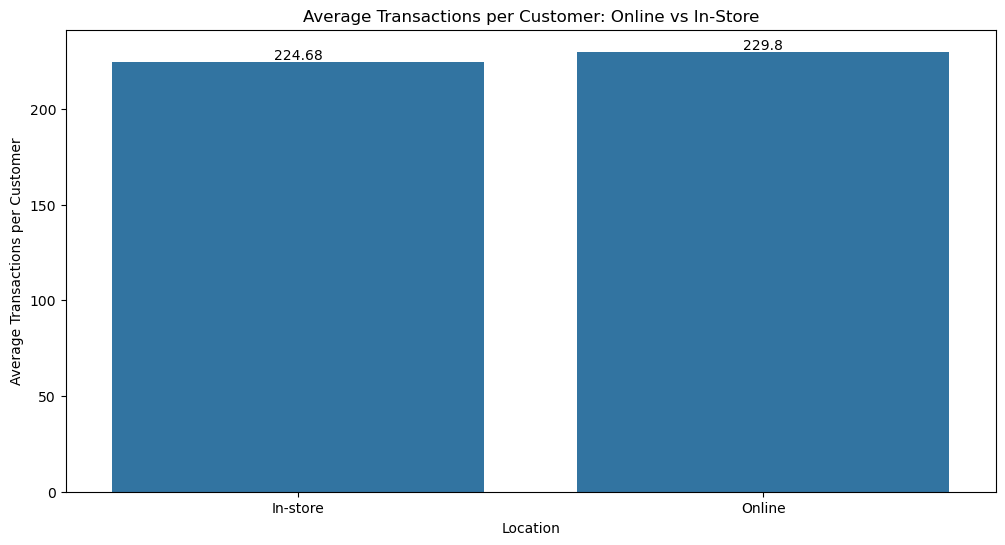

In [50]:
# Visualize the average transactions per customer by location
plt.figure(figsize=(12,6))
sns.barplot(data=location_analysis, x='Location', y='Average_Transaction_Per_Customer')
for index, value in enumerate(location_analysis['Average_Transaction_Per_Customer']):
    plt.text(index, value + 1, f'{value}', ha='center')
plt.ylabel('Average Transactions per Customer')
plt.title('Average Transactions per Customer: Online vs In-Store')
plt.show()